# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 35 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  40 баллов
* Задача 4 &mdash;  15 баллов




-----

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

#### <b><font color="blue">Легкая часть</font></b>
### Задача 1

В данной задаче мы продолжим работать с датасетом о диабете, с которым вы познакомились на занятии.

In [20]:
data = load_diabetes()
X, y = data['data'], data['target']

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Реализуйте линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [22]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self, flag = 0):
        self.flag = flag
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = np.shape(X)[0], np.shape(X)[1]
        if self.flag == 1:
             X = np.concatenate((X, (np.zeros(np.shape(X)[0]) + 1)[:,np.newaxis]), axis=1)
        self.theta = np.einsum('ij,jk->ik', np.linalg.inv(np.einsum('ij,jk->ik', X.T, X)), X.T) @ Y
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        if self.flag == 1:
            X = np.concatenate((X, (np.zeros(np.shape(X)[0]) + 1)[:,np.newaxis]), axis=1)
        y_pred = self.theta @ X.T
        
        return y_pred

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [23]:
model = MyLinearRegression(flag = 1)
print(model.fit(X_train, y_train).theta.round(3))

model_2 = LinearRegression(fit_intercept=True)
model_2.fit(X_train, y_train)
print(np.append(model_2.coef_, model_2.intercept_).round(3))

model.fit(X_train, y_train).theta.round(3) == np.append(model_2.coef_, model_2.intercept_).round(3)

[  37.9   -241.966  542.426  347.708 -931.461  518.044  163.404  275.31
  736.189   48.671  151.346]
[  37.9   -241.966  542.426  347.708 -931.461  518.044  163.404  275.31
  736.189   48.671  151.346]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Теперь обучите модель без свободного члена.

In [24]:
nmodel = MyLinearRegression()
print(model.fit(X_train, y_train).theta.round(3))

nmodel_2 = LinearRegression(fit_intercept=False)
nmodel_2.fit(X_train, y_train)
print(nmodel_2.coef_.round(3))

nmodel.fit(X_train, y_train).theta.round(3) == nmodel_2.coef_.round(3)

[  37.9   -241.966  542.426  347.708 -931.461  518.044  163.404  275.31
  736.189   48.671  151.346]
[ 125.208 -258.204  627.488  346.319 -803.224  312.818   45.068  211.978
  700.825  144.69 ]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [25]:
def mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

print(np.round(mean_squared_error(y_test, model.predict(X_test)), 3))
print(np.round(mean_squared_error(y_test, nmodel.predict(X_test)), 3))

53.853
167.217


Сделайте выводы.

**Вывод:** коэффициенты совпали в двух случаях; модель с учетом свободного члена меньше -> лучше

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [33]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(12, 6)):
    
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)   

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### **Профиль физика и профиль химия**

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице (сокращенный вид), которые действуют как молекулярные признаки. 300-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа (этот столбец для обучения не нужен). 301-й столбец — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso, этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*

In [34]:
data = pd.read_csv('physics_data.csv', index_col = 0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Разделите данные на признаки $X$ и целевые переменные $y$.

In [39]:
X, y = data.iloc[:,:300], data.iloc[:,-1]

Разделите выборку в отношении 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** у признаков может быть разный масштаб + размерность. То есть необходимо признаки одинаково/равноправно приблизить к нулю. Для достижения таких свойств: у всех признаков будет среднее = 0, дисперсия = 1

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [41]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X = X_train)
X_test = scaler.transform(X = X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать **оптимальные** параметры регуляризации.

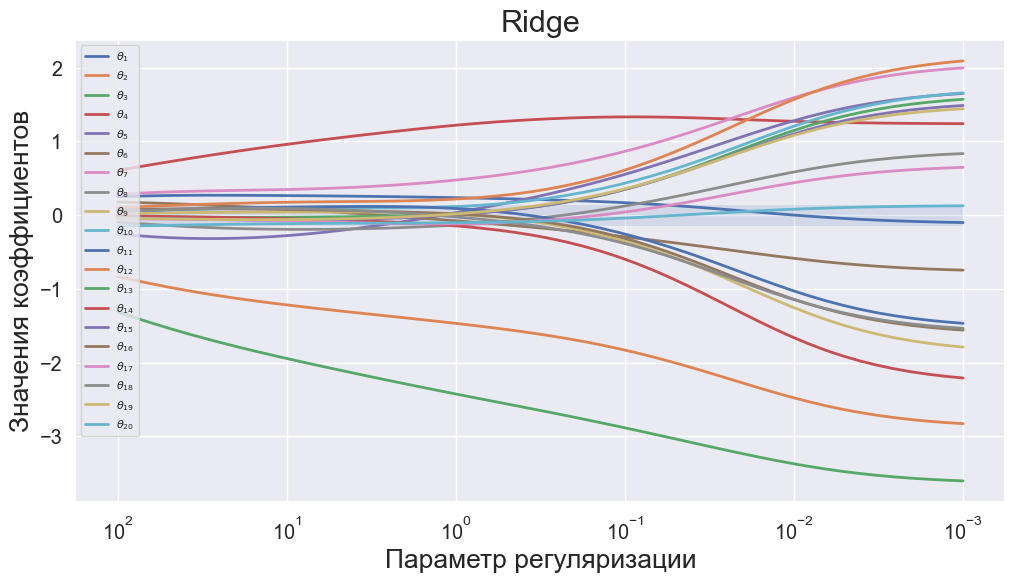

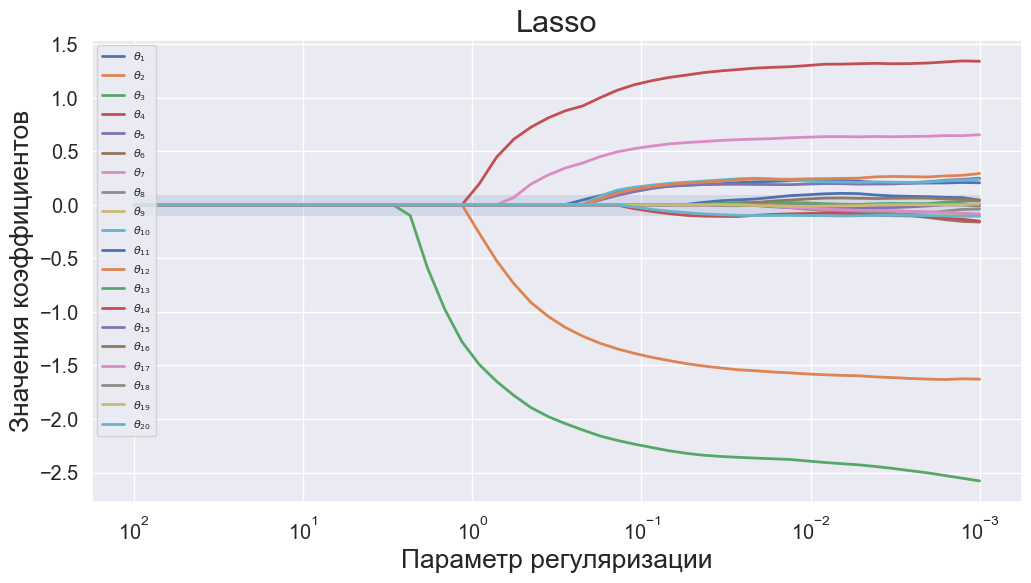

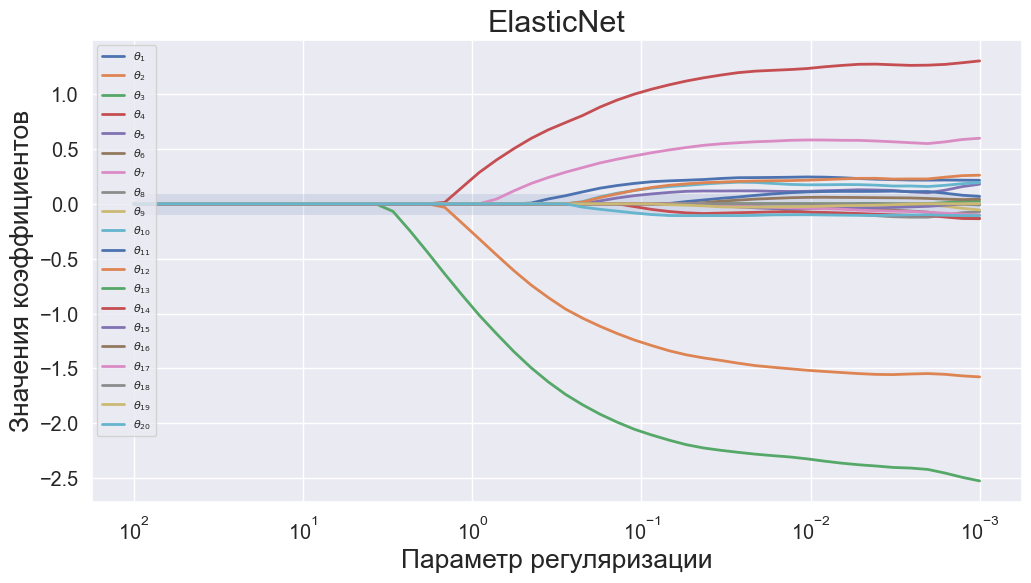

In [50]:
b = ['Ridge', 'Lasso', 'ElasticNet']
for i, model in zip(range(3), [Ridge(), Lasso(), ElasticNet()]):
    coefs = calculate_coef(model, X_train, y_train, -3, 2, 50)
    draw_track(coefs, -3, 2, 50, title=str(b[i]))

**Ответ:** в диапазоне (-2) - (-1) степеней десятки

так как левее - коэффициенты = 0 - параметр слишком большой

так как правее - коэффициенты = cons - параметр мал

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.997e+02, tolerance: 4.203e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


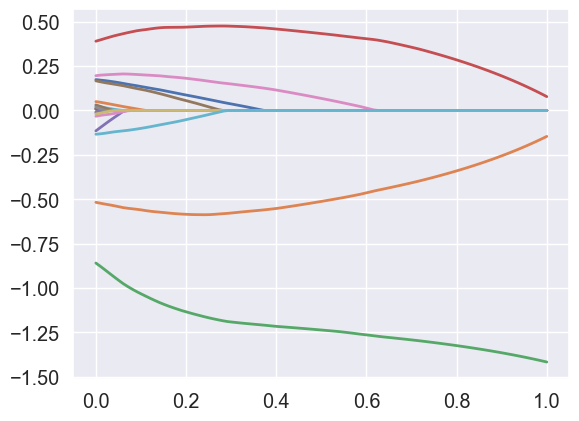

In [129]:
coefs = []
l1_ratio = np.linspace(0, 1, 100)
for l1 in l1_ratio:
    model = ElasticNet().set_params(l1_ratio = l1)
    model.fit(X_train, y_train)
    coefs.append(model.coef_[:20])
figsize=(12, 6)
for coef in np.array(coefs).T:
    plt.plot(l1_ratio, coef, linewidth=2)

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

 **Вывод:** l1_ratio = от 0 до 0.2 (параметры не const)

**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [66]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
linreg = {}
linreg['MSE'] = mean_squared_error(y_test, y_pred)
linreg['MAE'] = mean_absolute_error(y_test, y_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
print(linreg)

{'MSE': 8.232834407559162, 'MAE': 3.1348235177407164, 'MAPE': 0.228077918274609}


Реализуйте функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [123]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    error - функция, вычисляющая ошибку
    error_name - имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    alphas - массив величин alpha
    
    """
    figsize=(12, 6)
    
    for i, model in zip(range(3), [Ridge(), Lasso(), ElasticNet()]):
        errors = []
        ax=plt.gca()
        for a in alphas:
            model.set_params(alpha=a)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            errors.append(error(y_test, y_pred))
        ax.plot(alphas, errors, label = str(b[i]))
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Ошибка')
    plt.title(error_name)
    plt.legend()
    plt.show()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [124]:
alphas = np.logspace(-2, 8, 20)

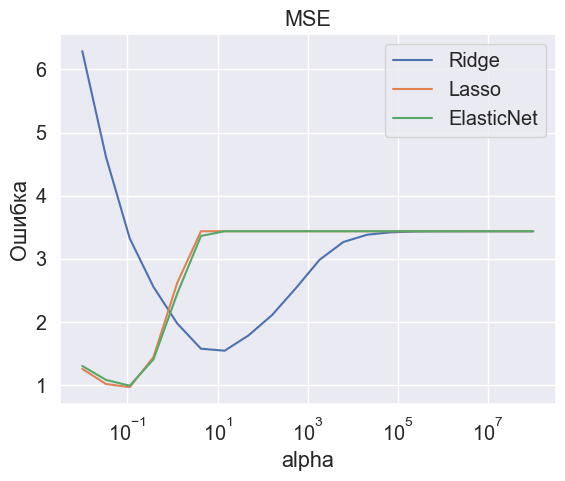

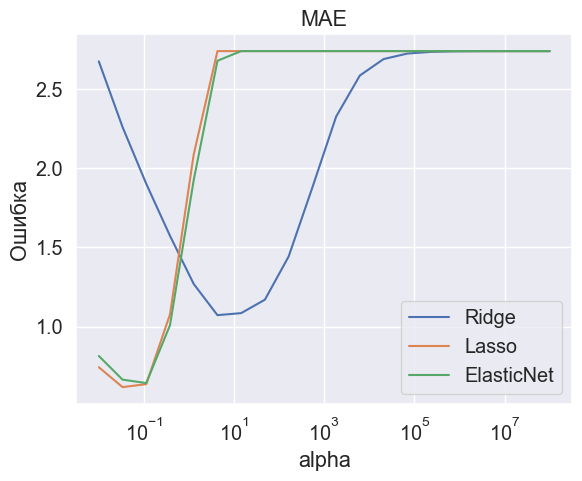

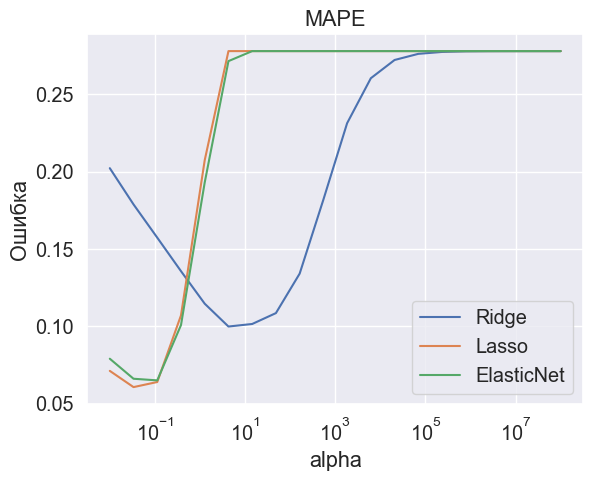

In [125]:
norm = {
    'MSE' : mean_squared_error,
    'MAE' : mean_absolute_error,
    'MAPE' : mean_absolute_percentage_error
}
for error_name, error in norm.items():
    draw_errors(error, error_name, alphas)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

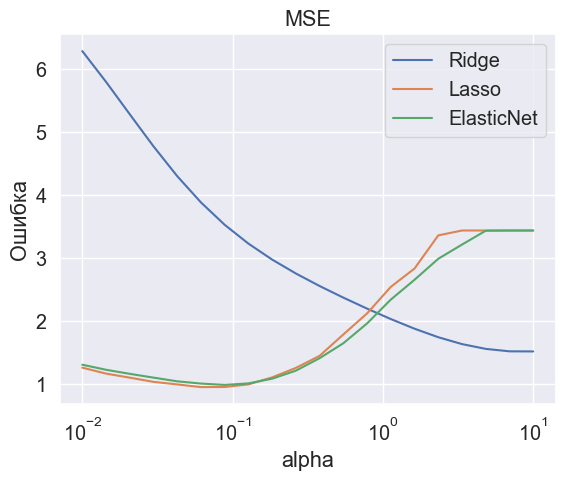

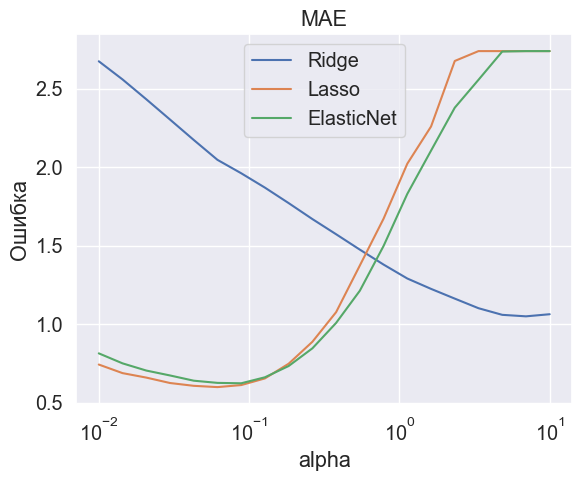

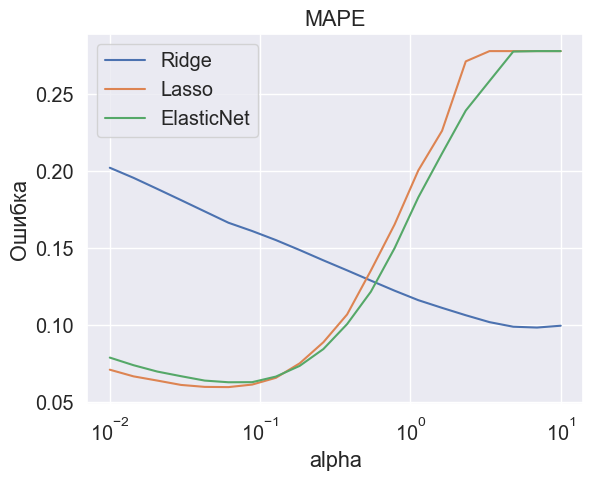

In [128]:
alphas = np.logspace(-2, 1, 20)
for error_name, error in norm.items():
    draw_errors(error, error_name, alphas)

**3.** Сделайте общий вывод по задаче.

**Вывод:** Лучшее предсказание достигается при l1_ratio около нуля, alpha около единицы

### Задача 4
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.
